# Exploratory Data Analysis (EDA) and Initial Visualization

## Configuration

In [7]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from IPython.display import Image

from ts_clf_event.data_handler.utils import split_data_time_based
from ts_clf_event.data_handler.data_preprocessing import DataPreprocessor

## Dataset loading

In [8]:
project_dir = '/Users/georgebatsis/Documents/Projects/ts_clf_event'
data_path = os.path.join(project_dir,"data/test_dataframe.csv")
data = pd.read_csv(data_path, index_col=0)
data

,start_value,value,speed,level,frequency,status,process,datetime,provider
0,0.0,30.36,0.0,1.0,0.0,0.0,0,2020-06-01 00:00:00,2
1,0.0,26.82,0.0,0.0,0.0,-1.0,0,2020-06-01 00:00:21,1
2,0.0,29.72,0.0,1.0,0.0,0.0,0,2020-06-01 00:01:01,2
3,0.0,27.57,0.0,0.0,0.0,-1.0,0,2020-06-01 00:01:22,1
4,0.0,30.79,0.0,1.0,0.0,0.0,0,2020-06-01 00:02:01,2
...,...,...,...,...,...,...,...,...,...
86931,0.0,28.35,0.0,1.0,0.0,0.0,0,2020-07-01 23:57:36,2
86932,0.0,25.70,0.0,0.0,0.0,-1.0,0,2020-07-01 23:58:19,1
86933,0.0,27.83,0.0,1.0,0.0,0.0,0,2020-07-01 23:58:37,2
86934,0.0,24.34,0.0,0.0,0.0,-1.0,0,2020-07-01 23:59:20,1


## Data pipeline

1. To simulate real-world scenarios, the dataset is split into training and test sets based on time.
2. Feature engineering:
   - Window-based rolling statistics (mean, std, min, max).
   - Difference features for specified lags.
3. Handling missing values using the training data statistics.
4. Scaling features to standardize the data.

A custom data preprocessor is created to incorporate the above transformations.

In [9]:
test_size_percent = 0.4
label_col = "process"

train_df, test_df = split_data_time_based(data_path, test_size_percent, label_col)

y_train = train_df[label_col]
y_test = test_df[label_col]

X_train = train_df.drop(label_col, axis=1)
X_test = test_df.drop(label_col, axis=1)

windows = "auto"
features_to_roll = ["value", "level", "frequency", "speed"]
diff_lags = [1, 2]

preprocessor = DataPreprocessor(
    features_to_roll=features_to_roll,
    features_to_diff=features_to_roll,
    windows=windows,
    diff_lags=diff_lags,
    groupby_col="provider",
)

pipeline = preprocessor.get_pipeline()

pipeline.fit(X_train, y_train)

x_train_transformed = pipeline.transform(X_train)
x_test_transformed = pipeline.transform(X_test)

Number of data points in train set: 52162
Number of data points in test set: 34774
Class distribution in train set: process
0    49683
1     2479
Name: count, dtype: int64
Class distribution in test set: process
0    33014
1     1760
Name: count, dtype: int64
Time in train set: 2020-06-01 00:00:00 to 2020-06-19 07:41:30
Time in test set: 2020-06-19 07:41:56 to 2020-07-01 23:59:37
Windows for 1: [60, 90, 120]
Windows for 2: [60, 90, 120]


## New features box - plots

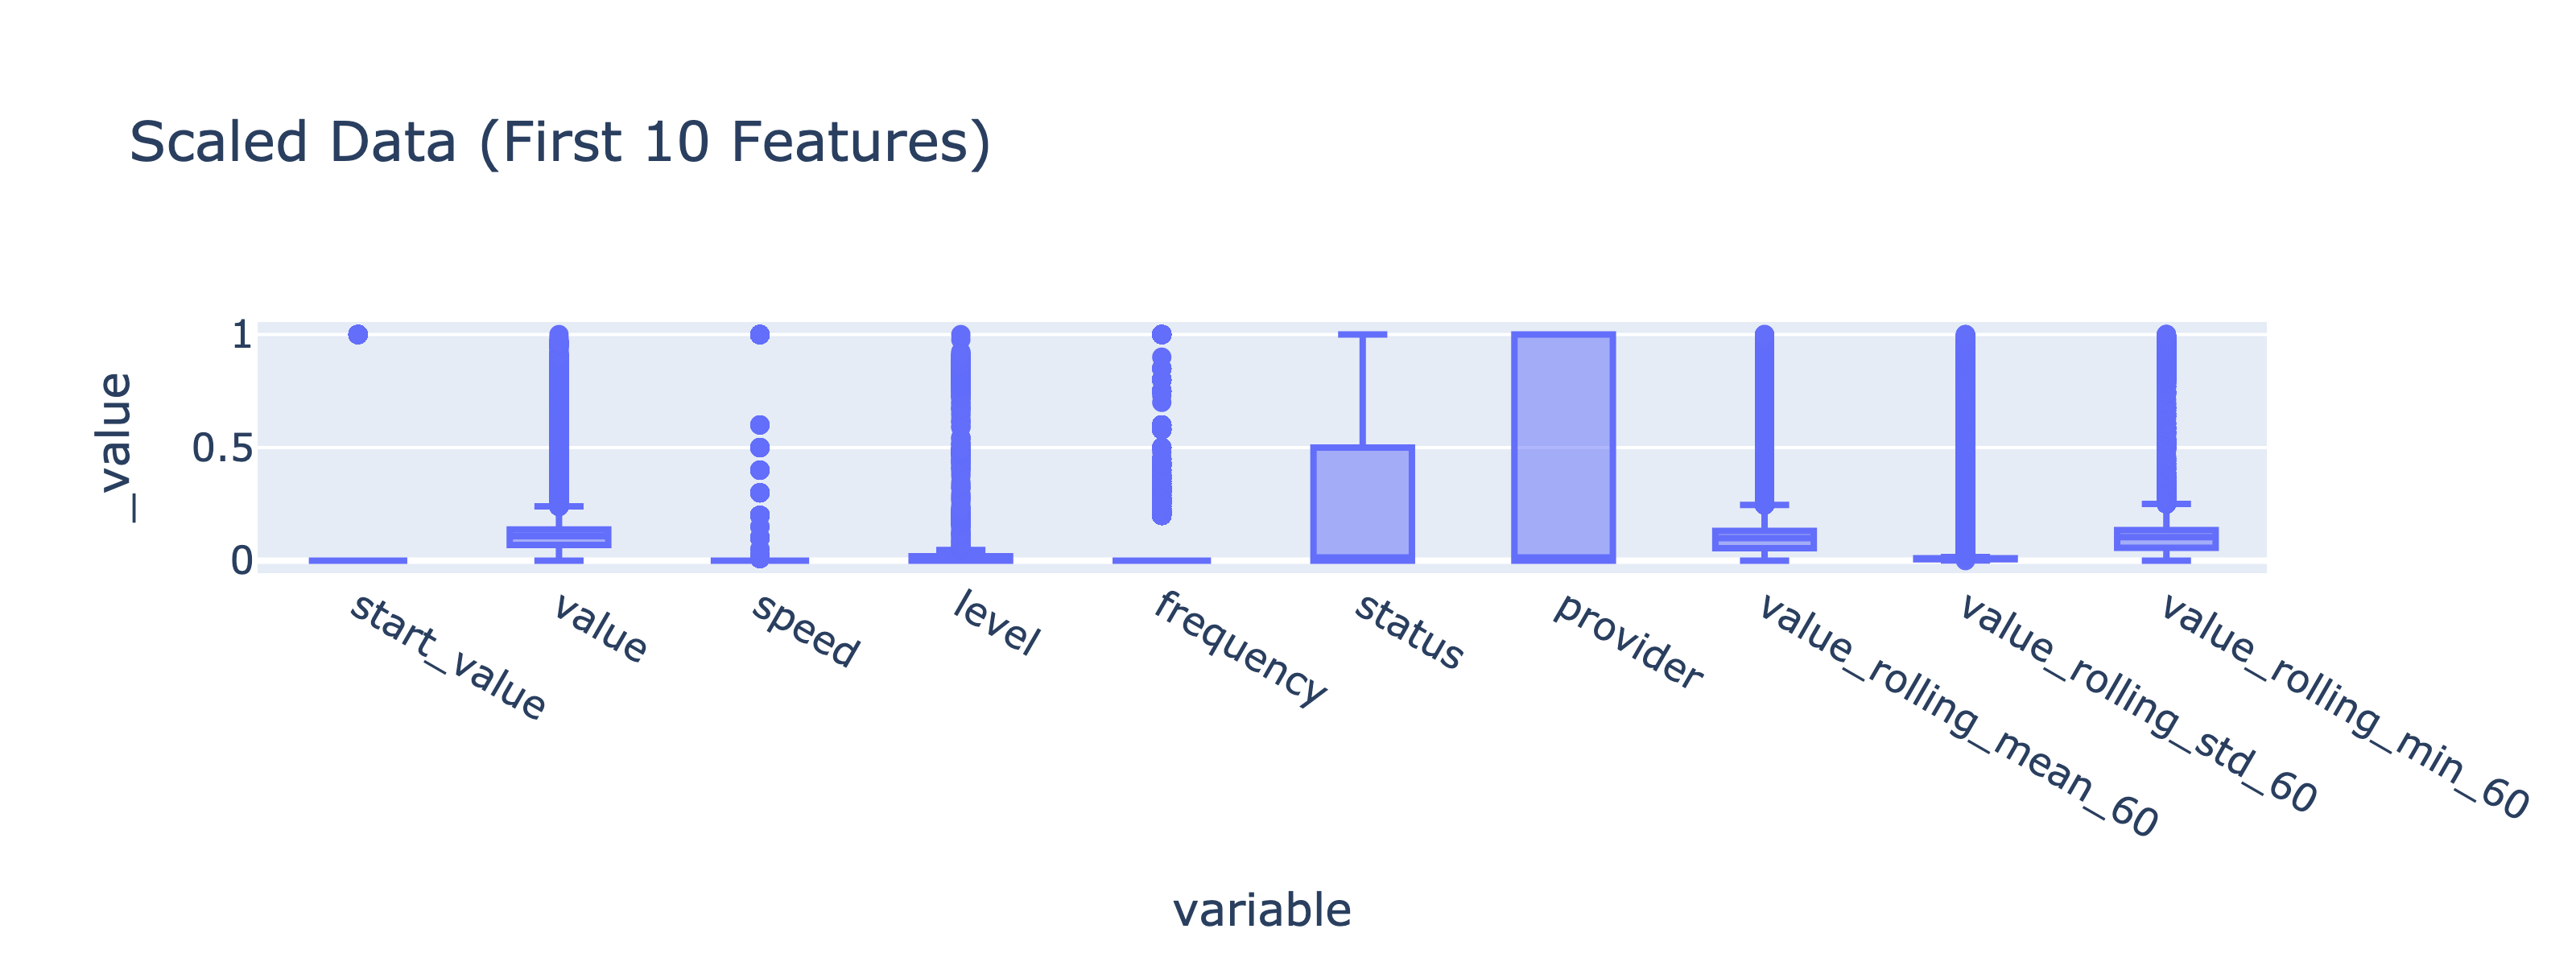

In [10]:
fig = px.box(x_train_transformed.iloc[:, :10], title="Scaled Data (First 10 Features)")
Image(fig.to_image(format="png", width=800, height=300, scale=4))

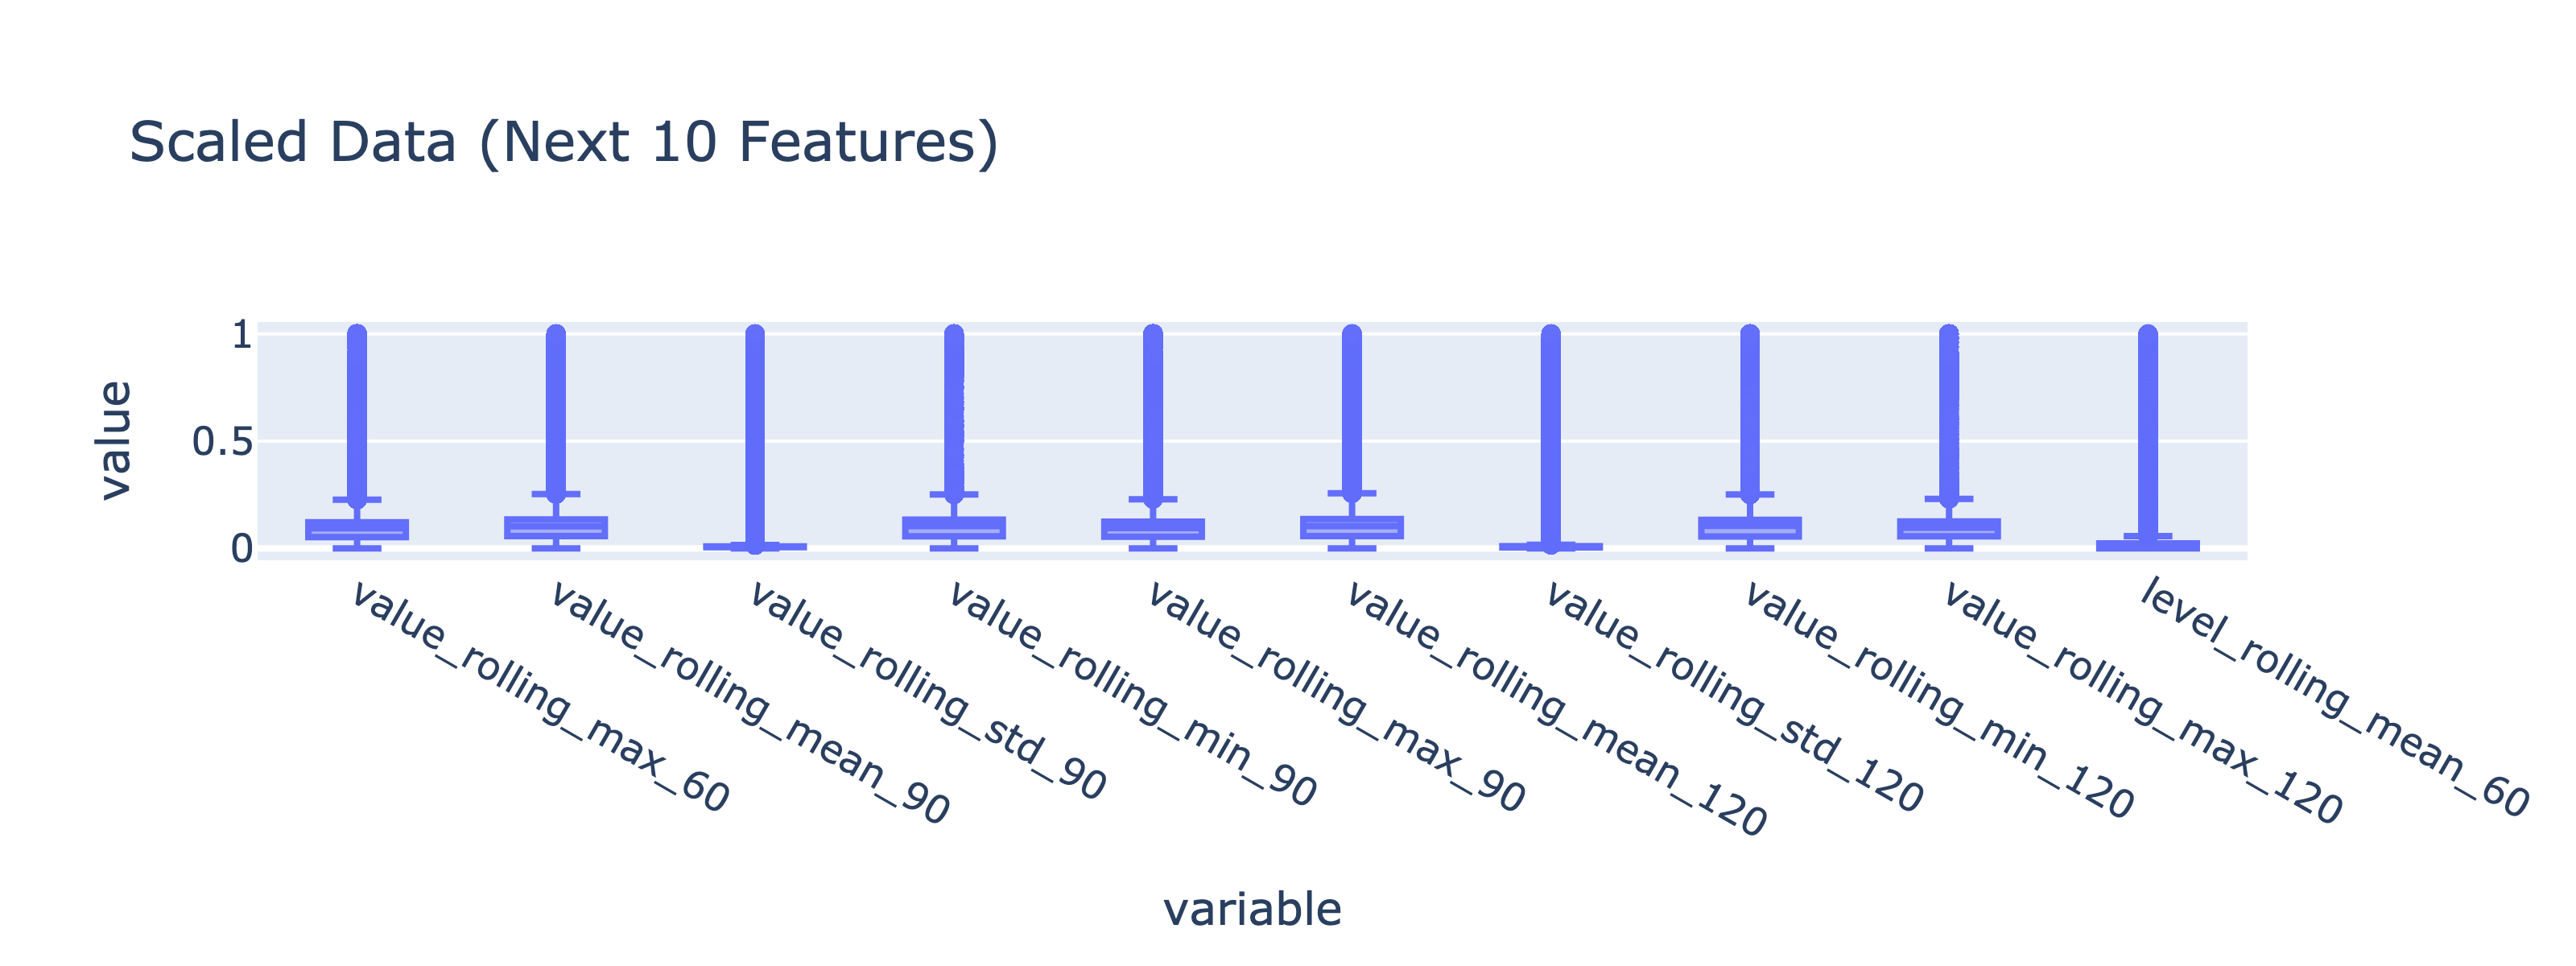

In [11]:
fig = px.box(x_train_transformed.iloc[:, 10:20], title="Scaled Data (Next 10 Features)")
Image(fig.to_image(format="png", width=800, height=300, scale=4))

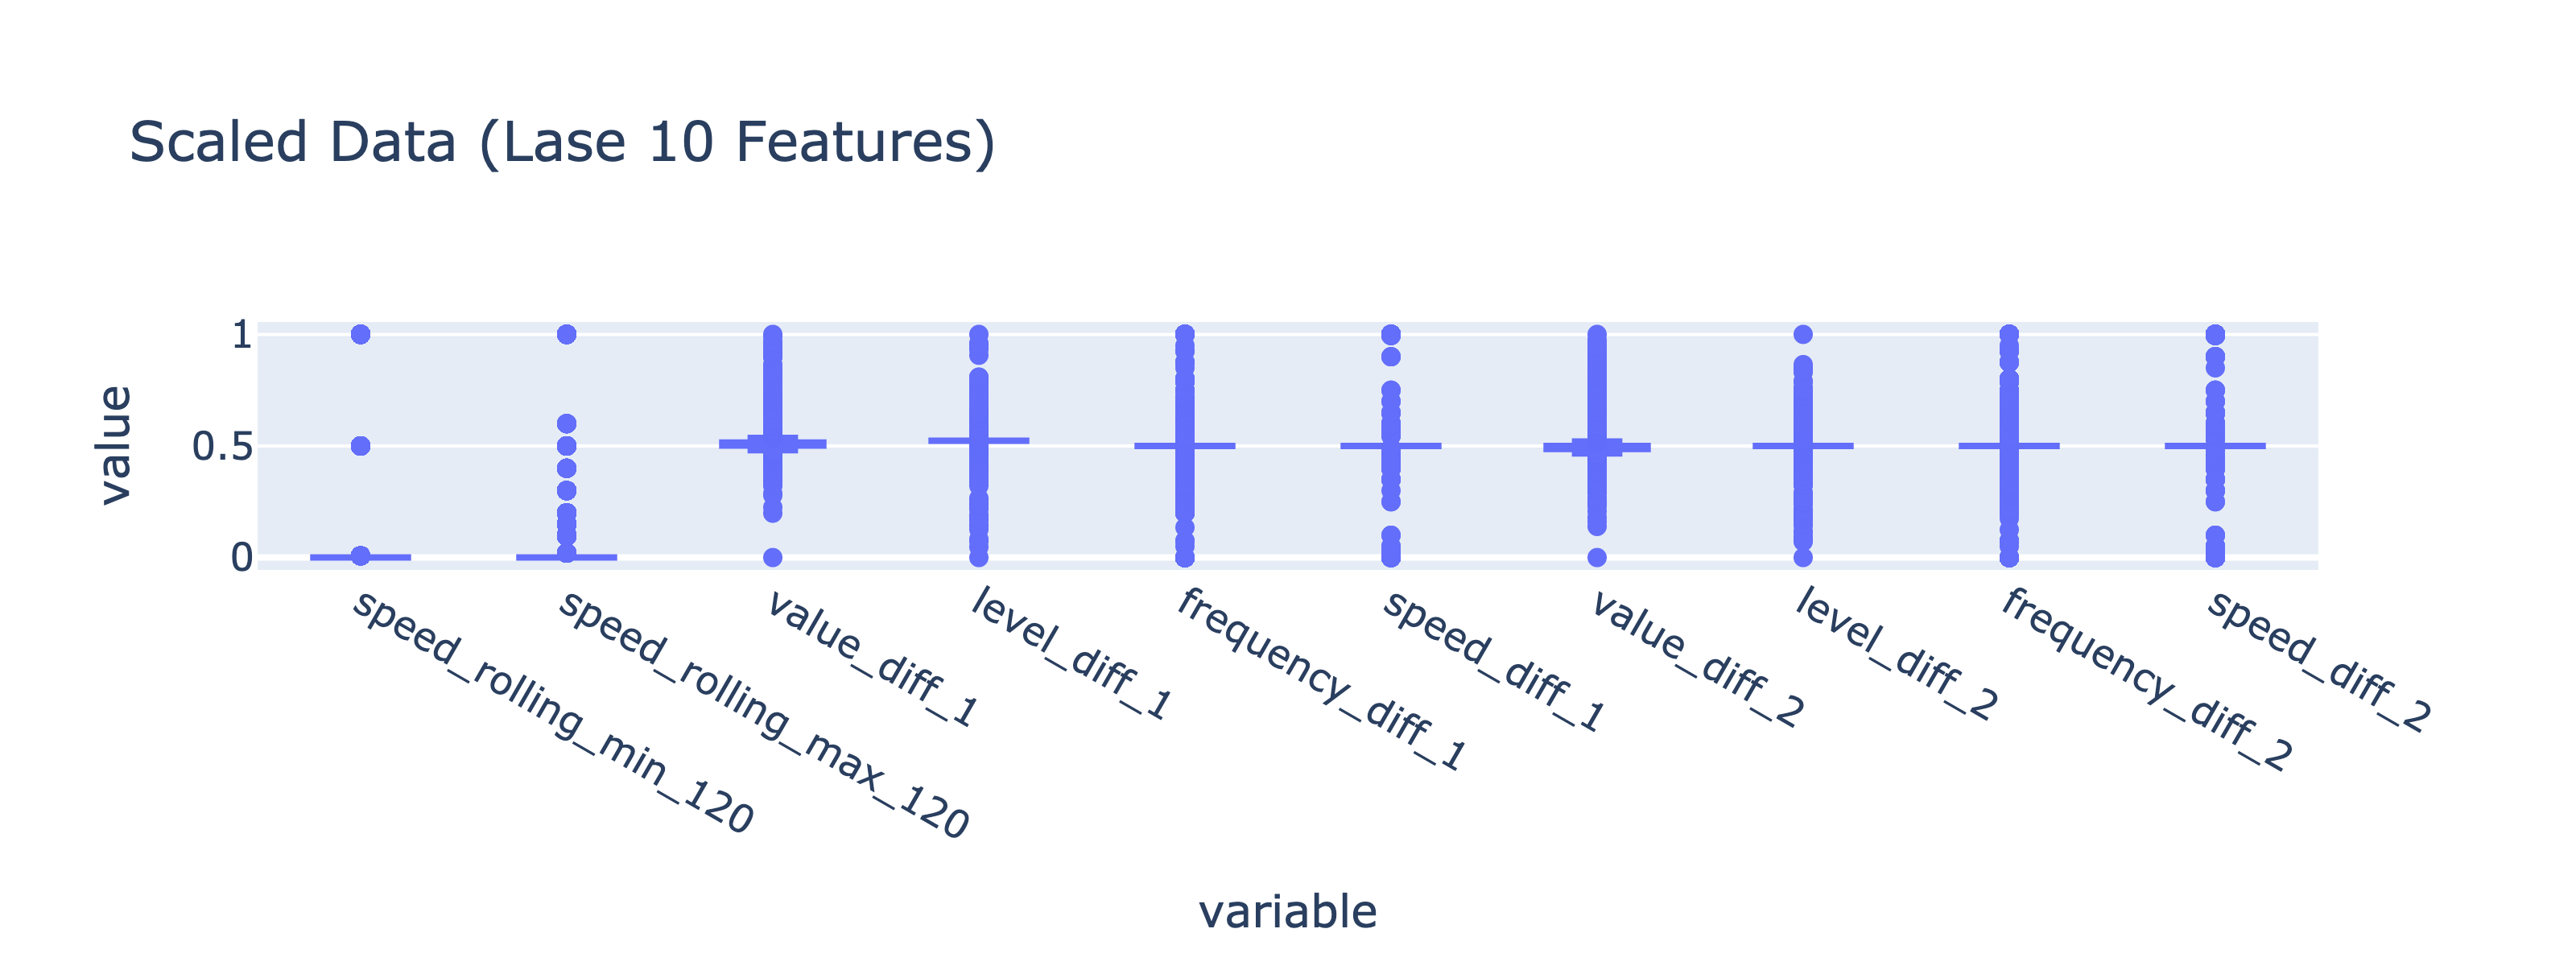

In [12]:
fig = px.box(x_train_transformed.iloc[:, -10:], title="Scaled Data (Lase 10 Features)")
Image(fig.to_image(format="png", width=800, height=300, scale=4))